In [1]:
import numpy as np
import pandas as pd


In [2]:
##Importação dos dados de treino

In [3]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_14908\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_14908\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_14908\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [4]:
##Remoção de colunas inteiramente preenchidas por NaN

In [5]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [6]:
##Introdução do cabeçalho do data frame

In [7]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [8]:
##Geração de Histogramas e seleção de variáveis

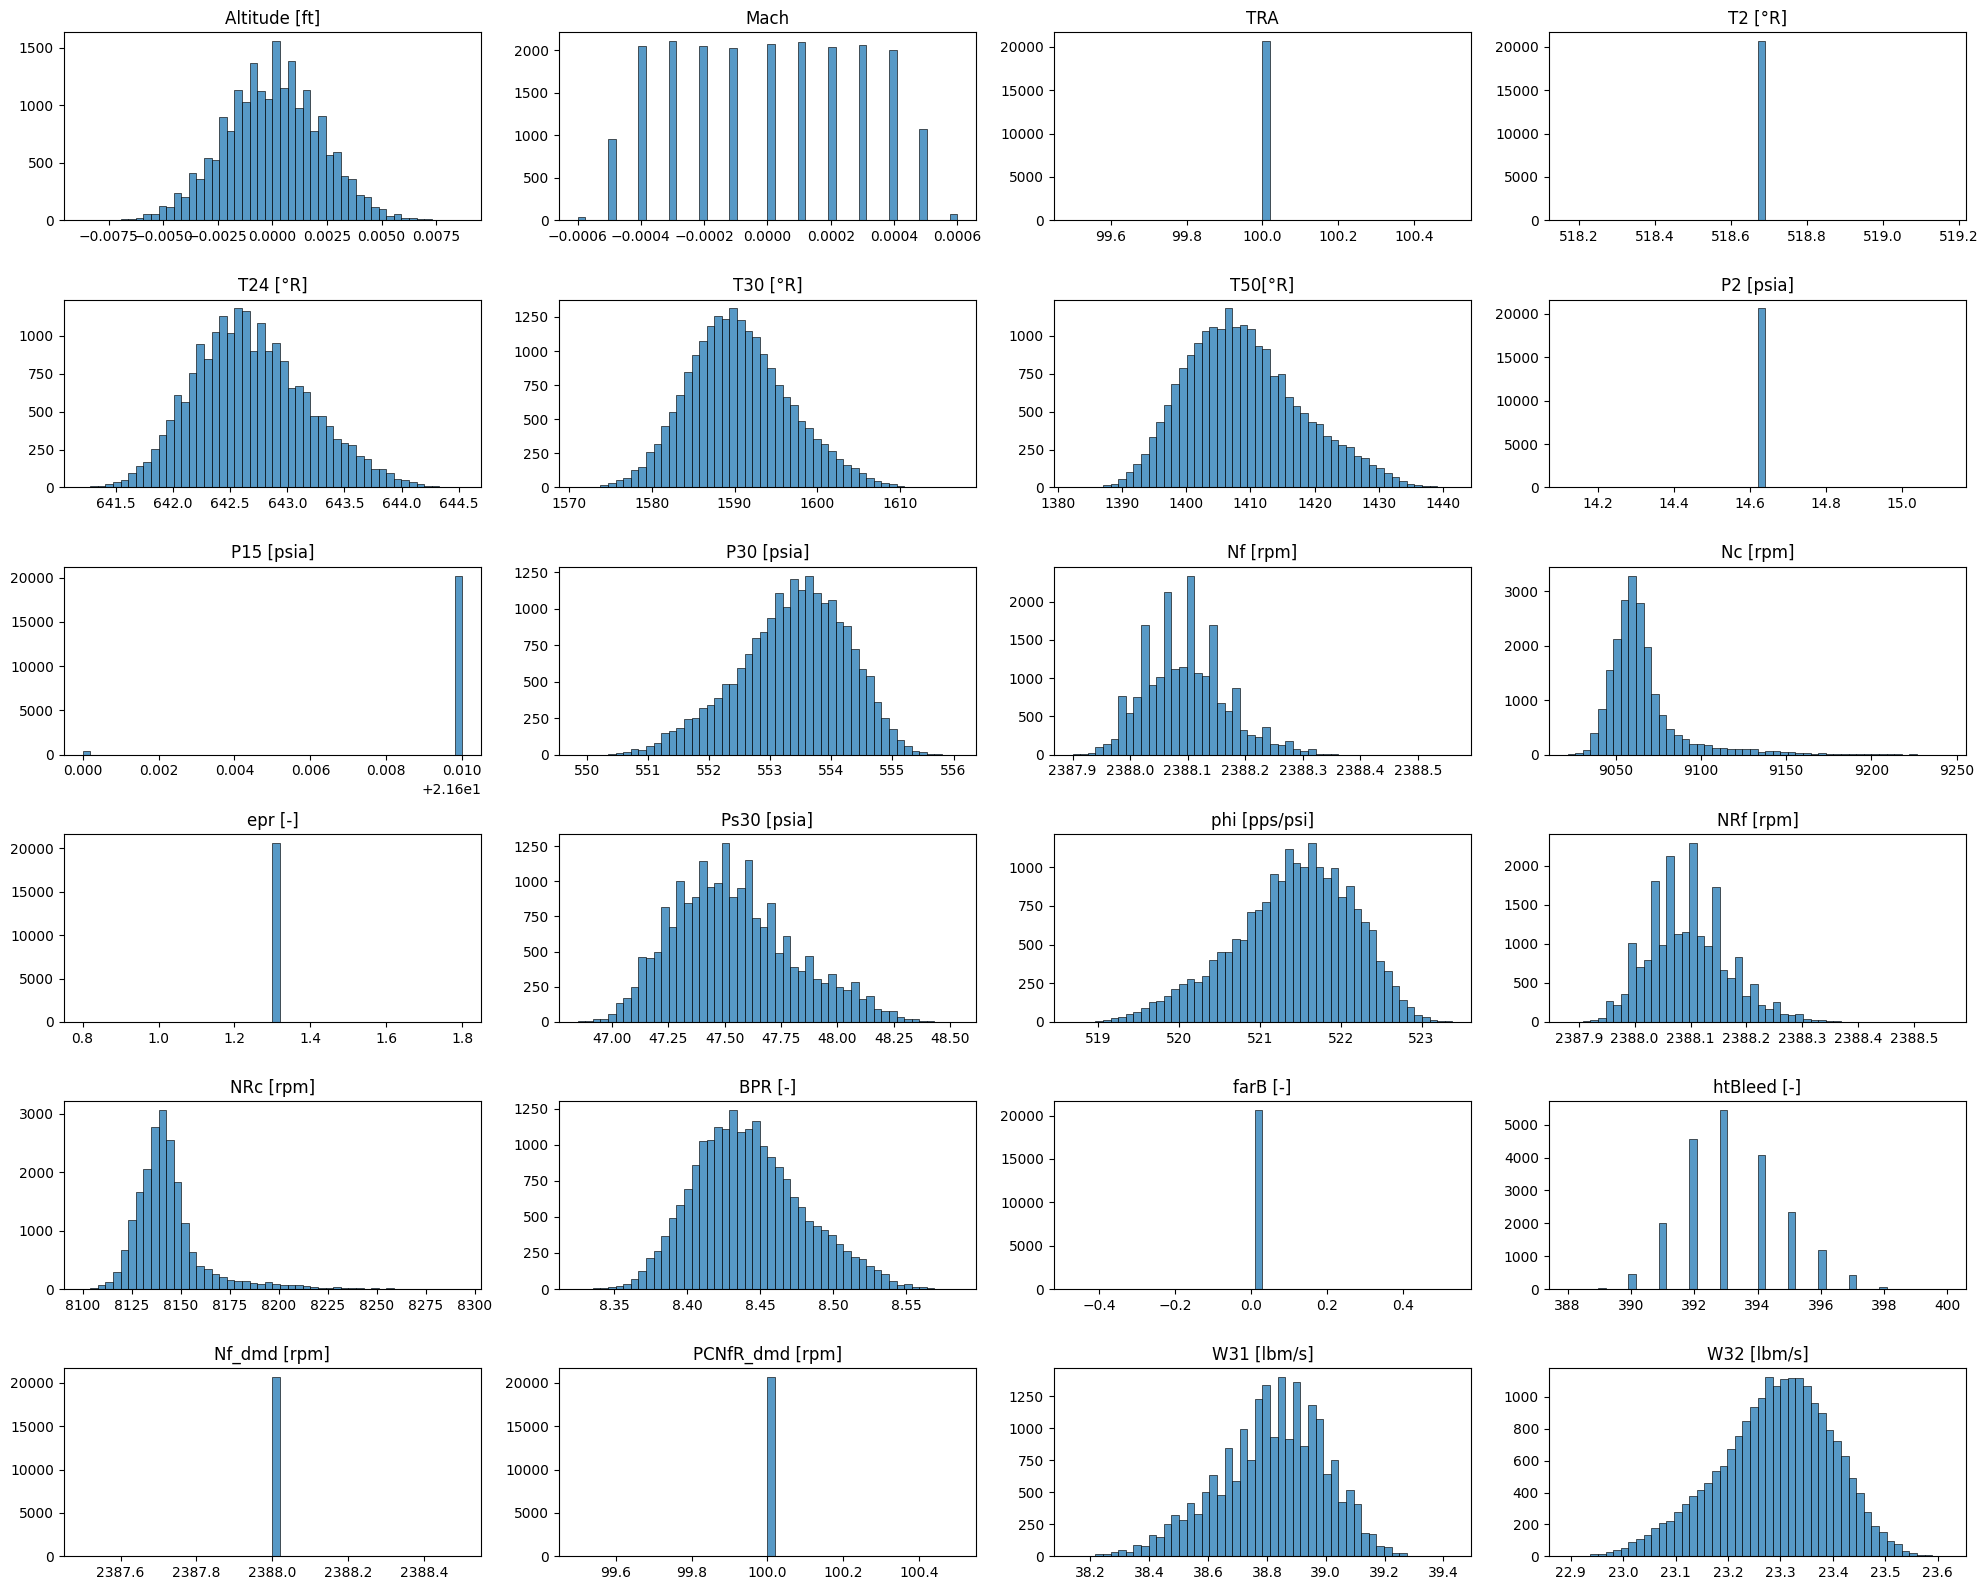

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [10]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [11]:
##Normalização 

In [12]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [13]:
##Definição dos targets para regressão e classificação nos dados de treino

In [14]:
limit_r = 130 
limit_c = 50
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit_r:
            aux.append(limit_r)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]
label_train = [1 if x >= limit_c else 0 for x in rul_train]

In [15]:
##Visualização de um ciclo de vida de um motor 

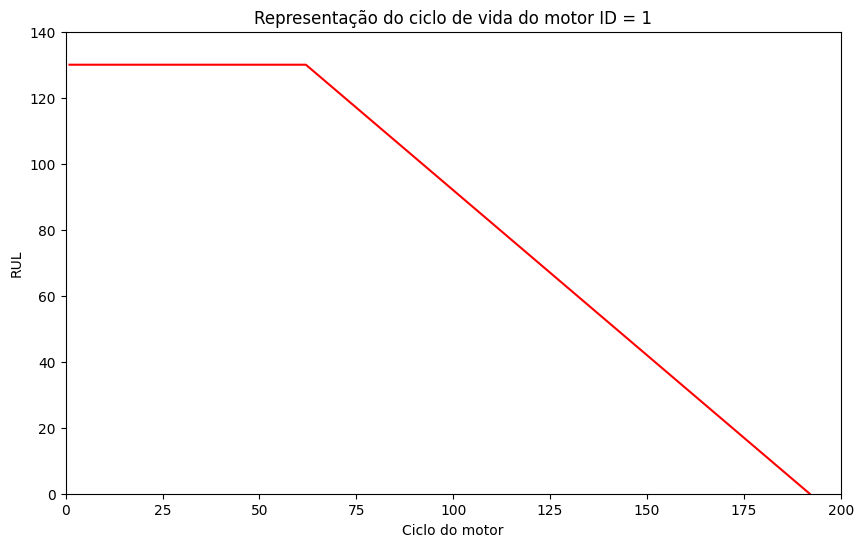

In [16]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [17]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [18]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit_r:
            rul_test.append(limit_r)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]
label_test = [1 if x >= limit_c else 0 for x in rul_test] 

In [19]:
##Criação das janelas de tempo para dados de treino e de teste

In [20]:
def time_window(data,rul,label,window_size,step):
    x,y_r,y_c = [], [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y_r.append(rul[l+f-1]) 
            y_c.append(label[l+f-1])
        l += len(engine)
    return np.array(x), np.array(y_r), np.array(y_c)
window_size = 30
step = 1
x_train, y_train_r,y_train_c= time_window(features_train,rul_train,
                                                        label_train,window_size,step)

print(x_train.shape,y_train_r.shape,y_train_c.shape)  
x_test, y_test_r,y_test_c = time_window(features_test,rul_test,
                                                        label_test,window_size,step)
print(x_test.shape,y_test_r.shape,y_test_c.shape)

(17731, 30, 18) (17731,) (17731,)
(10196, 30, 18) (10196,) (10196,)


In [21]:
##Separação das variáveis de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train_r,test_size=0.2,random_state=1)
x3,x4,y3,y4 = train_test_split(x_train,y_train_c,test_size=0.2,random_state=1) 

x1=x1.astype('float32')
x2=x2.astype('float32')
x3=x3.astype('float32')
x4=x4.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')
y3=y3.astype('float32')
y4=y4.astype('float32')


In [23]:
##Criação do modelo de regressão

In [24]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm_r=hp.Int('layers_lstm_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(LSTM(hp.Int('lstm_r_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm_r):
        return_seq = i <n_layers_lstm_r -1
        model.add(LSTM(hp.Int(f'lstm_r_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Int(f'dense_r_{i+1}',min_value=32,max_value=256,step=32),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=5,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models()[0]
best_model_lstm.summary()
tuner_lstm.get_best_hyperparameters()[0].values

Trial 5 Complete [00h 18m 06s]
val_loss: 1892.3687744140625

Best val_loss So Far: 193.55029296875
Total elapsed time: 00h 56m 22s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 160)        │       114,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 160)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 160)            │       205,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,185 (1.24 MB)

 Trainable params: 325,185 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

{'layers_lstm_r': 1,
 'layers_dense_r': 1,
 'lstm_r_0': 160,
 'dropout_0': np.float64(0.5000000000000001),
 'dense_r_1': 32,
 'learning_rate_r': 0.001}

In [25]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 284.6917 - mean_absolute_error: 12.5118 - mean_squared_error: 284.6917

71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - loss: 263.3977 - mean_absolute_error: 12.0513 - mean_squared_error: 263.3977 - val_loss: 177.5347 - val_mean_absolute_error: 9.8666 - val_mean_squared_error: 177.5347
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 252.9407 - mean_absolute_error: 11.8474 - mean_squared_error: 252.9407

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 253.9077 - mean_absolute_error: 11.8633 - mean_squared_error: 253.9077 - val_loss: 229.2341 - val_mean_absolute_error: 11.4782 - val_mean_squared_error: 229.2341
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 253.5166 - mean_absolute_error: 11.8529 - mean_squared_error: 253.5166

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 251.5721 - mean_absolute_error: 11.8241 - mean_squared_error: 251.5721 - val_loss: 187.3040 - val_mean_absolute_error: 9.9000 - val_mean_squared_error: 187.3040
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 244.1772 - mean_absolute_error: 11.6288 - mean_squared_error: 244.1772

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 247.0715 - mean_absolute_error: 11.7105 - mean_squared_error: 247.0715 - val_loss: 188.4770 - val_mean_absolute_error: 10.0908 - val_mean_squared_error: 188.4770


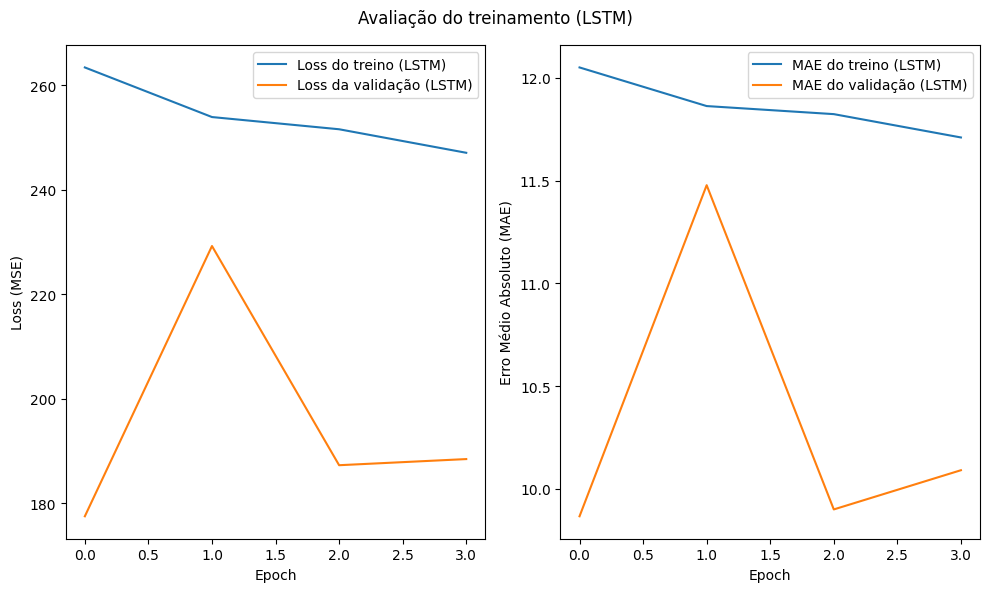

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('lstm_model_r.h5', monitor='val_loss')
history_r=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_r.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_r.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_r.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_r.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [27]:
##Testando o modelo com os dados de teste 

In [28]:
rul_prev_r = best_model_lstm.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [29]:
##Avaliando o modelo

230.40839939762716
15.18
0.11715333793043965
11.333589368401531
0.767343131922273
Tempo de 3481.7140884399414s


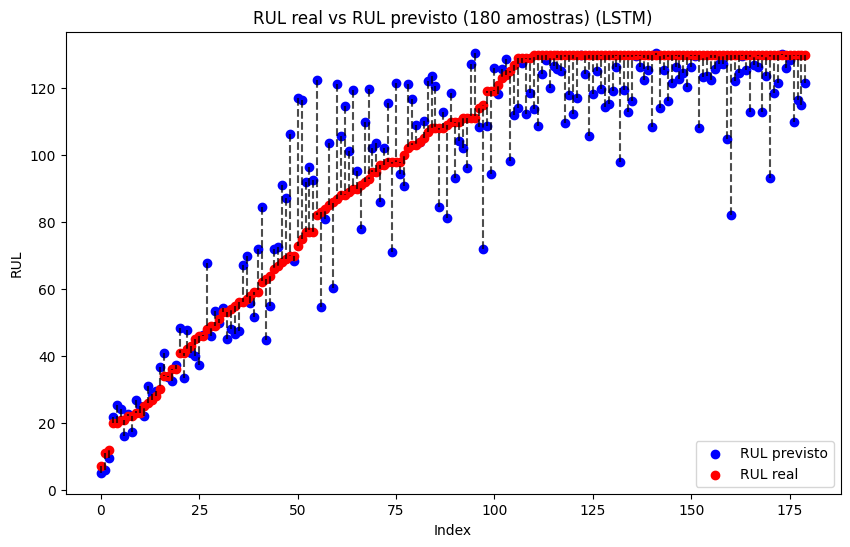

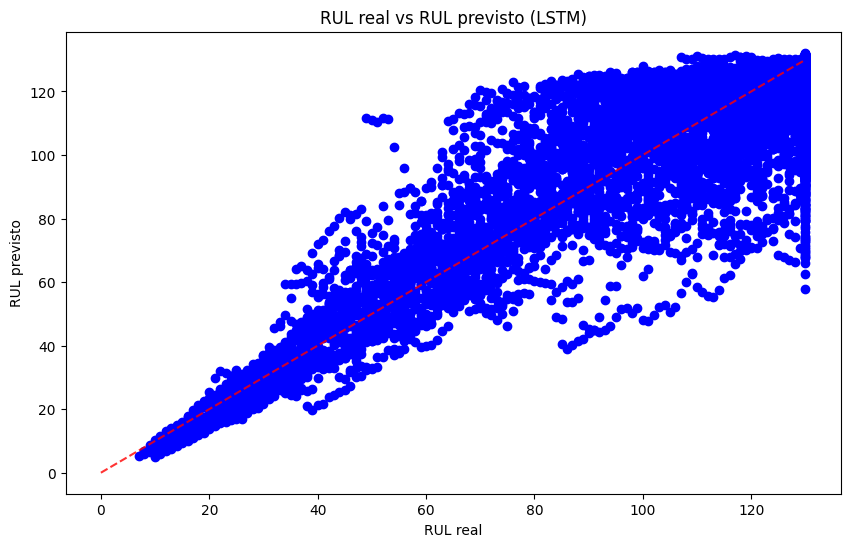

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [31]:
##Criando modelo BiLSTM

In [32]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi_r=hp.Int('layers_bi_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(Bidirectional(LSTM(hp.Int('bi_r_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi_r):
        return_seq = i <n_layers_bi_r -1
        model.add(Bidirectional(LSTM(hp.Int(f'bi_r_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Int(f'dense_r_{i+1}',min_value=32,max_value=256,step=32),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=5,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_regression',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models()[0]
best_model_bi.summary()
tuner_bilstm.get_best_hyperparameters()[0].values

Trial 5 Complete [00h 03m 50s]
val_loss: 242.0016632080078

Best val_loss So Far: 216.22605895996094
Total elapsed time: 01h 17m 57s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 512)        │       563,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 30, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 30, 320)        │       861,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 320)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 30, 256)        │       459,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,636,161 (13.87 MB)

 Trainable params: 3,636,161 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

{'layers_bi_r': 4,
 'layers_dense_r': 1,
 'bi_r_0': 256,
 'dropout_0': np.float64(0.4000000000000001),
 'dense_r_1': 96,
 'learning_rate_r': 0.0001,
 'bi_r_1': 160,
 'dropout_1': np.float64(0.4000000000000001),
 'bi_r_2': 128,
 'dropout_2': np.float64(0.30000000000000004),
 'bi_r_3': 64,
 'dropout_3': np.float64(0.5000000000000001),
 'dense_r_2': 192}

In [33]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 332.8639 - mean_absolute_error: 13.6876 - mean_squared_error: 332.8639

71/71 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - loss: 309.3899 - mean_absolute_error: 13.2491 - mean_squared_error: 309.3899 - val_loss: 207.8322 - val_mean_absolute_error: 10.7281 - val_mean_squared_error: 207.8322
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 300.4266 - mean_absolute_error: 13.1141 - mean_squared_error: 300.4266

71/71 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 298.4073 - mean_absolute_error: 12.9948 - mean_squared_error: 298.4073 - val_loss: 220.7052 - val_mean_absolute_error: 11.0044 - val_mean_squared_error: 220.7052
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 288.6020 - mean_absolute_error: 12.7808 - mean_squared_error: 288.6020

71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - loss: 292.0637 - mean_absolute_error: 12.9044 - mean_squared_error: 292.0637 - val_loss: 232.3038 - val_mean_absolute_error: 11.1609 - val_mean_squared_error: 232.3038
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 296.1826 - mean_absolute_error: 12.9994 - mean_squared_error: 296.1827

71/71 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - loss: 289.7383 - mean_absolute_error: 12.8311 - mean_squared_error: 289.7383 - val_loss: 204.0000 - val_mean_absolute_error: 10.7078 - val_mean_squared_error: 204.0000
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 289.6785 - mean_absolute_error: 12.8031 - mean_squared_error: 289.6784

71/71 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - loss: 291.2636 - mean_absolute_error: 12.8426 - mean_squared_error: 291.2636 - val_loss: 244.7806 - val_mean_absolute_error: 11.8289 - val_mean_squared_error: 244.7806
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 283.3148 - mean_absolute_error: 12.5625 - mean_squared_error: 283.3149

71/71 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - loss: 284.7452 - mean_absolute_error: 12.6567 - mean_squared_error: 284.7452 - val_loss: 208.1839 - val_mean_absolute_error: 10.5839 - val_mean_squared_error: 208.1839
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 290.3877 - mean_absolute_error: 12.7984 - mean_squared_error: 290.3877

71/71 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - loss: 284.6609 - mean_absolute_error: 12.6988 - mean_squared_error: 284.6609 - val_loss: 246.9111 - val_mean_absolute_error: 12.4834 - val_mean_squared_error: 246.9111


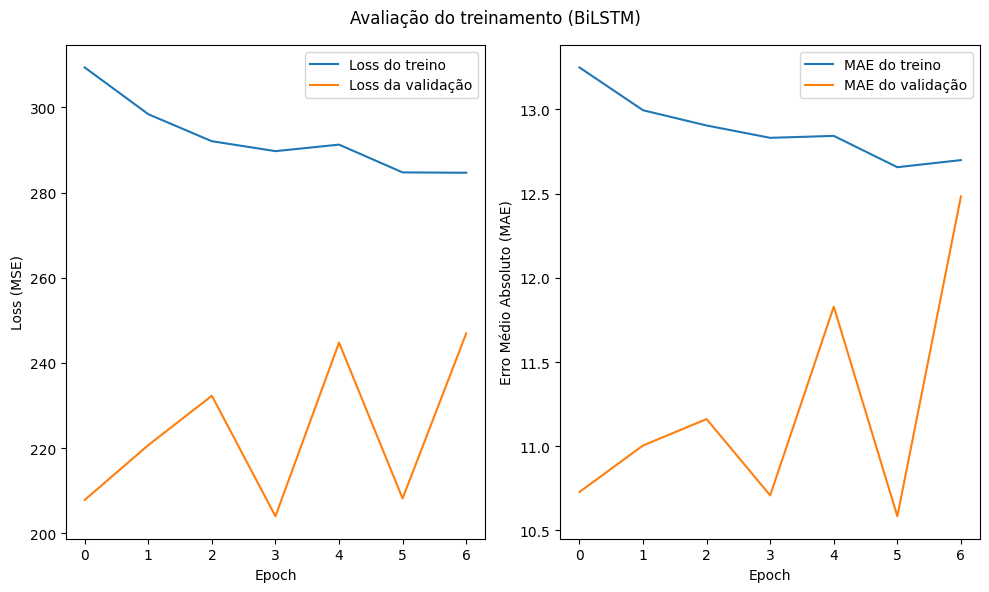

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('bi_model_r.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [35]:
##Testando o modelo com os dados de teste

In [36]:
rul_prev_r = best_model_bi.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step


In [37]:
##Avaliando o modelo

273.3009367062118
16.53
0.15286163355647844
13.302681102805066
0.7240320225173562
Tempo de 5466.081650018692s


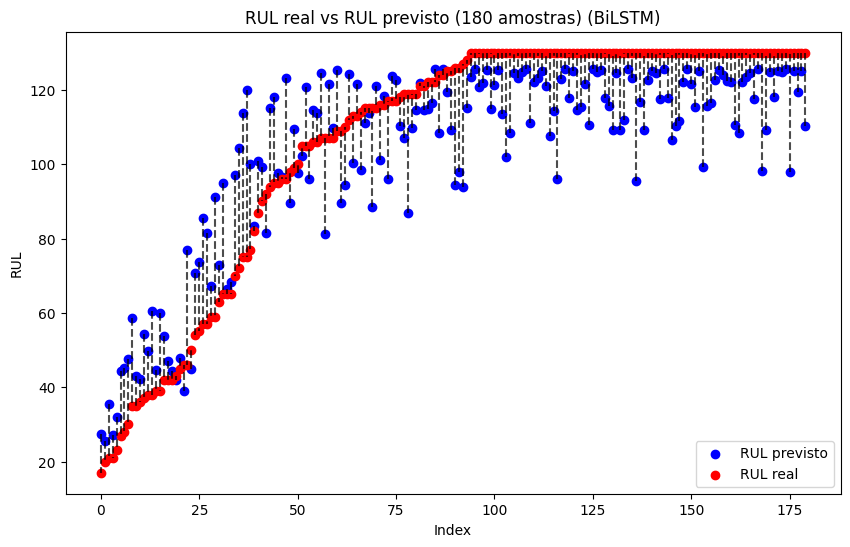

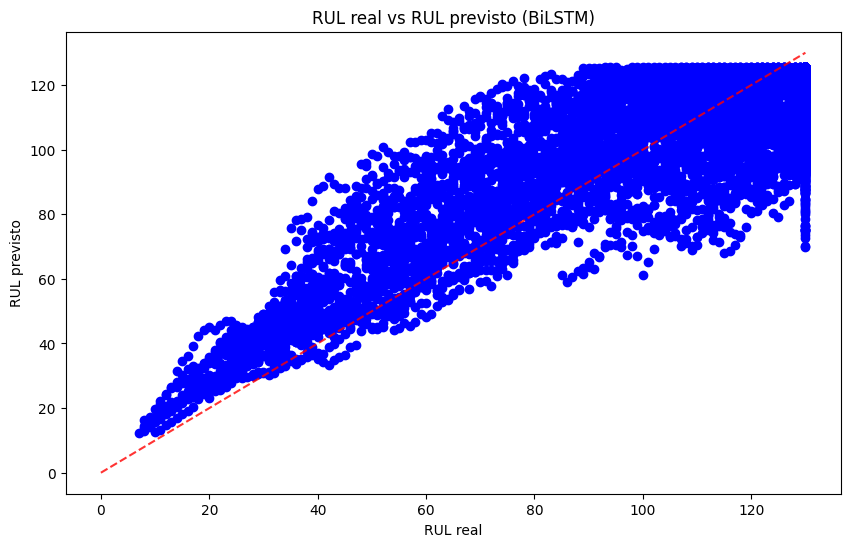

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()